# Classifying Student Based on Fuzzy Logic
## Pre-processing and Exploring Data

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder


In [190]:
# File path (update as needed)
file_path = 'data.csv'

# Load CSV with semicolon delimiter as specified in the dataset
df = pd.read_csv(file_path, delimiter=';')
# Remove tabs and other special characters from column names
df.columns = df.columns.str.replace(r'[\t]', ' ', regex=True)
display(df.head())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [191]:
# Check for missing values
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [192]:
# Summary statistics
print("Summary statistics:")
display(df.describe())

Summary statistics:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [193]:
# Ensure correct data types
# Convert categorical features to category type where applicable
categorical_features = [
    'Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
    'Previous qualification', 'Nacionality', "Mother's qualification",
    "Father's qualification", "Mother's occupation", "Father's occupation",
    'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
    'Gender', 'Scholarship holder', 'International', 'Target',
]
for col in categorical_features:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [194]:
# Split into features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']

In [195]:
# Encode the target variable (Graduate, Dropout, Enrolled) to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [196]:
# Load and preprocess data
print(f"Features Shape: {X.shape}")
print(f"Target Shape: {y.shape}")


Features Shape: (4424, 36)
Target Shape: (4424,)


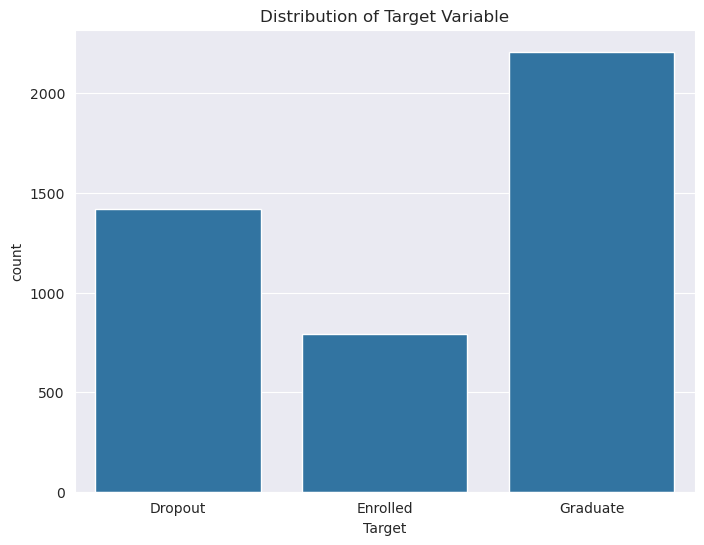

In [197]:
# Plot distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

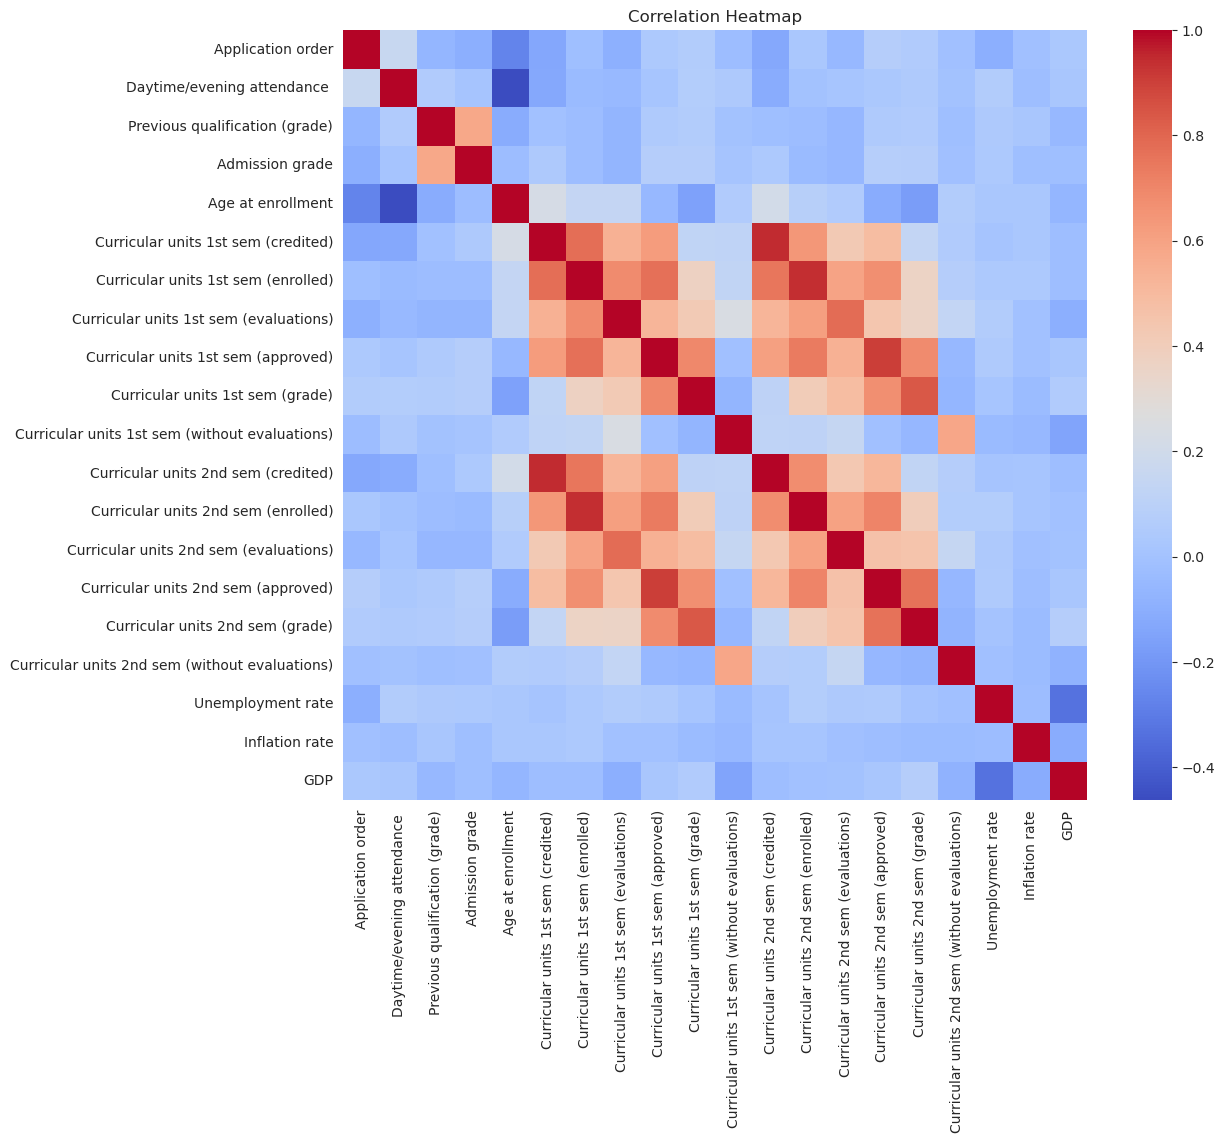

In [198]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show

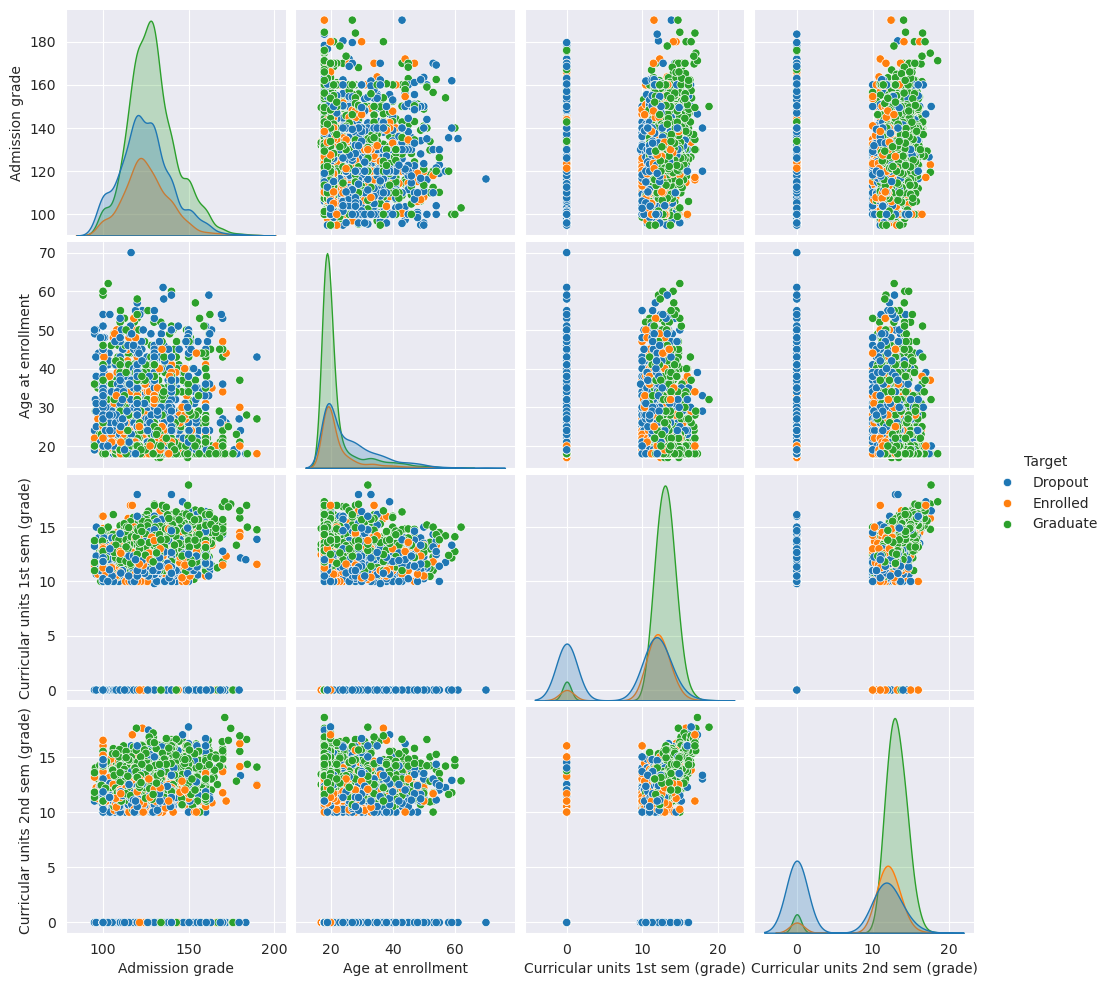

In [199]:
# Pairplot for selected features
selected_features = [
    'Admission grade', 'Age at enrollment',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
]

sns.pairplot(df[selected_features + ['Target']], hue='Target')
plt.show()

In [200]:
# Convert categorical variables to numerical codes for mutual information calculation
X_encoded = X.copy()
for col in X.columns:
    if X[col].dtype.name == 'category':
        X_encoded[col] = X[col].cat.codes

In [201]:
# Calculate mutual information scores
mi_scores = mutual_info_classif(X_encoded, y, random_state=42)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values('MI Score', ascending=False)
mi_df

,Feature,MI Score
30,Curricular units 2nd sem (approved),0.310207
31,Curricular units 2nd sem (grade),0.239324
24,Curricular units 1st sem (approved),0.233439
25,Curricular units 1st sem (grade),0.184882
16,Tuition fees up to date,0.100460
29,Curricular units 2nd sem (evaluations),0.096761
23,Curricular units 1st sem (evaluations),0.075691
19,Age at enrollment,0.065516
3,Course,0.053349
22,Curricular units 1st sem (enrolled),0.052744


In [202]:
# Select top features (minimum of 10, but let's take top 15 to ensure relevance)
selected_features = mi_df['Feature'].head(15).tolist()
print("\nTop 15 Features by Mutual Information:")
print(mi_df.head(15))


Top 15 Features by Mutual Information:
                                   Feature  MI Score
30     Curricular units 2nd sem (approved)  0.310207
31        Curricular units 2nd sem (grade)  0.239324
24     Curricular units 1st sem (approved)  0.233439
25        Curricular units 1st sem (grade)  0.184882
16                 Tuition fees up to date  0.100460
29  Curricular units 2nd sem (evaluations)  0.096761
23  Curricular units 1st sem (evaluations)  0.075691
19                       Age at enrollment  0.065516
3                                   Course  0.053349
22     Curricular units 1st sem (enrolled)  0.052744
1                         Application mode  0.046695
6           Previous qualification (grade)  0.044584
28     Curricular units 2nd sem (enrolled)  0.041576
10                     Mother's occupation  0.037915
18                      Scholarship holder  0.037139


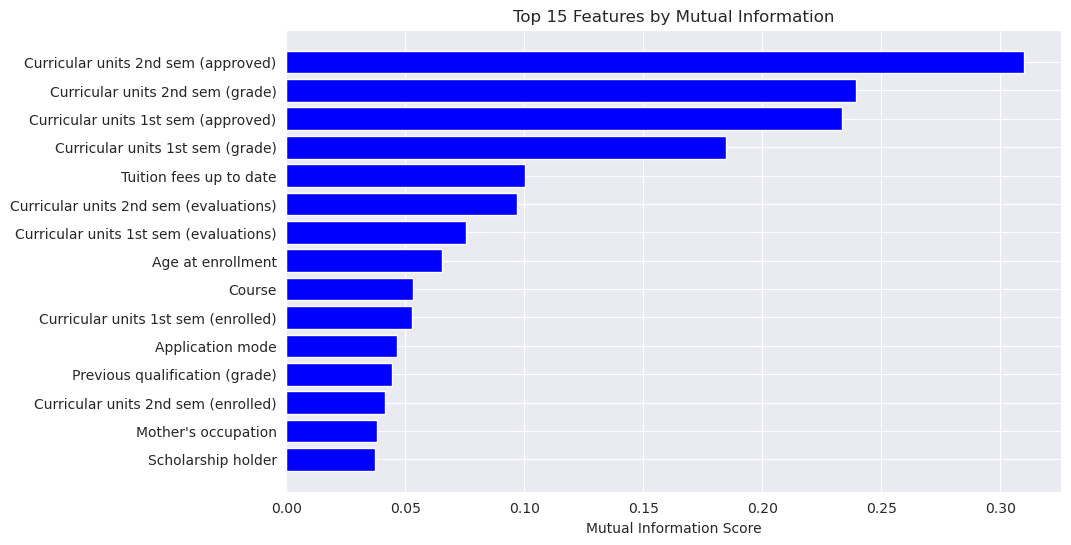

In [203]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'].head(15), mi_df['MI Score'].head(15), color='blue')
plt.xlabel('Mutual Information Score')
plt.title('Top 15 Features by Mutual Information')
plt.gca().invert_yaxis()
plt.show()

In [204]:
# Subset the data with selected features
X_selected = X[selected_features]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

In [205]:
# Reset indices to ensure alignment
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = pd.Series(y_train, name='Target').reset_index(drop=True)
y_test = pd.Series(y_test, name='Target').reset_index(drop=True)

print("Data Split:")
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")


Data Split:
Training Set: 3539 samples
Testing Set: 885 samples


In [206]:
# Save the split datasets for later use
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Remove rows with missing Target values
train_data = train_data.dropna(subset=['Target'])
test_data = test_data.dropna(subset=['Target'])

# Save to CSV
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)
print("Training and testing sets saved as 'train_data.csv' and 'test_data.csv'")


Training and testing sets saved as 'train_data.csv' and 'test_data.csv'


In [207]:
# # Apply SMOTE to balance classes
# from imblearn.over_sampling import SMOTE
#
# # Load original training data
# X_train = pd.read_csv('train_data.csv').drop('Target', axis=1)
# y_train = pd.read_csv('train_data.csv')['Target']
# # Apply SMOTE
# smote = SMOTE(random_state=1)
# X_smote, y_smote = smote.fit_resample(X_train, y_train)
#
# # Save balanced data
# smote_df = pd.concat([X_smote, y_smote], axis=1)
# smote_df.to_csv('train_data.csv', index=False)
# print("\nSMOTE applied. New training data saved as 'train_data.csv'.")
#

## Fuzzy Feature Representation


In [208]:
# Load the training data
train_data = pd.read_csv('train_data.csv')
X_train = train_data.drop('Target', axis=1)
y_train = train_data['Target']

print("Training data loaded successfully.")
print(f"Features: {X_train.columns.tolist()}")

Training data loaded successfully.
Features: ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Tuition fees up to date', 'Curricular units 2nd sem (evaluations)', 'Curricular units 1st sem (evaluations)', 'Age at enrollment', 'Course', 'Curricular units 1st sem (enrolled)', 'Application mode', 'Previous qualification (grade)', 'Curricular units 2nd sem (enrolled)', "Mother's occupation", 'Scholarship holder']


In [209]:
# Define triangular membership function
def triangular_membership(x, a, b, c, boundary = None):
    """Calculate membership degree for a triangular function."""
    if boundary == 'left' and x < b or boundary == 'right' and x > b:
            return 1
    elif x <= a or x >= c:
        return 0
    elif a < x <= b:
        return (x - a) / (b - a)
    elif b < x < c:
        return (c - x) / (c - b)
    return 0

def define_fuzzy_sets(feature_data):
    """Define fuzzy sets (low, medium, high) for a continuous feature."""
    min_val = feature_data.min()
    max_val = feature_data.max()
    q1 = np.percentile(feature_data, 25)
    median = np.median(feature_data)
    q3 = np.percentile(feature_data, 75)

    # Low: trapezoidal-like with boundary='left'
    low_a, low_b, low_c = min_val, min_val + (q1 - min_val) / 5, q1 + (median - q1) / 5
    # Medium: triangular
    medium_a, medium_b, medium_c = q1 - (q1 - min_val) / 5, median, q3 + (max_val - q3) / 5
    # High: trapezoidal-like with boundary='right'
    high_a, high_b, high_c = q3 - (q3 - median) / 5, max_val - (max_val - q3) / 5, max_val

    return {
        'low': (low_a, low_b, low_c, 'left'),
        'medium': (medium_a, medium_b, medium_c, None),
        'high': (high_a, high_b, high_c, 'right')
    }

# Function to fuzzify a continuous feature
def fuzzify_continuous(feature_data, fuzzy_sets):
    """Fuzzify a continuous feature into low, medium, high membership degrees."""
    feature_name = feature_data.name  # Get the feature name
    memberships = {}
    for label in ['low', 'medium', 'high']:  # Explicitly define expected labels
        if label not in fuzzy_sets:
            raise ValueError(f"Missing fuzzy set for label '{label}' in feature '{feature_name}'")
        a, b, c, boundary = fuzzy_sets[label]
        memberships[f"{feature_name}_{label}"] = feature_data.apply(
            lambda x: triangular_membership(x, a, b, c, boundary)
        )
    return pd.DataFrame(memberships, index=feature_data.index)

# Function to fuzzify a binary feature
def fuzzify_binary(feature_data):
    """Fuzzify a binary feature into two crisp sets: 0 and 1."""
    feature_name = feature_data.name  # Get the feature name
    if not feature_data.isin([0, 1]).all():
        raise ValueError(f"Binary feature '{feature_name}' contains non-binary values: {feature_data.unique()}")
    return pd.DataFrame({
        f"{feature_name}_0": (feature_data == 0).astype(float),
        f"{feature_name}_1": (feature_data == 1).astype(float),
    }, index=feature_data.index)


In [210]:
continuous_features = [col for col in X_train.columns if X_train[col].nunique() > 2]
binary_features = [col for col in X_train.columns if X_train[col].nunique() == 2]

print(f"Continuous features: {continuous_features}")
print(f"Binary features: {binary_features}")

Continuous features: ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 1st sem (evaluations)', 'Age at enrollment', 'Course', 'Curricular units 1st sem (enrolled)', 'Application mode', 'Previous qualification (grade)', 'Curricular units 2nd sem (enrolled)', "Mother's occupation"]
Binary features: ['Tuition fees up to date', 'Scholarship holder']


In [211]:
# Fuzzify continuous features
fuzzy_continuous = {}
for feature in continuous_features:
    fuzzy_sets = define_fuzzy_sets(X_train[feature])
    fuzzy_continuous[feature] = fuzzify_continuous(X_train[feature], fuzzy_sets)

# Fuzzify binary features
fuzzy_binary = {}
for feature in binary_features:
    fuzzy_binary[feature] = fuzzify_binary(X_train[feature])

print("Features fuzzified successfully.")

Features fuzzified successfully.


In [212]:
# Plot membership functions for two continuous features
def plot_membership_functions(feature, fuzzy_sets):
    """Plot the membership functions for a given feature."""
    x = np.linspace(X_train[feature].min(), X_train[feature].max(), 500)
    plt.figure(figsize=(10, 6))
    for label, params in fuzzy_sets.items():
        a, b, c, boundary = params
        y = [triangular_membership(val, a, b, c, boundary) for val in x]
        plt.plot(x, y, label=label)
    plt.title(f'Membership Functions for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.grid(True)
    plt.show()


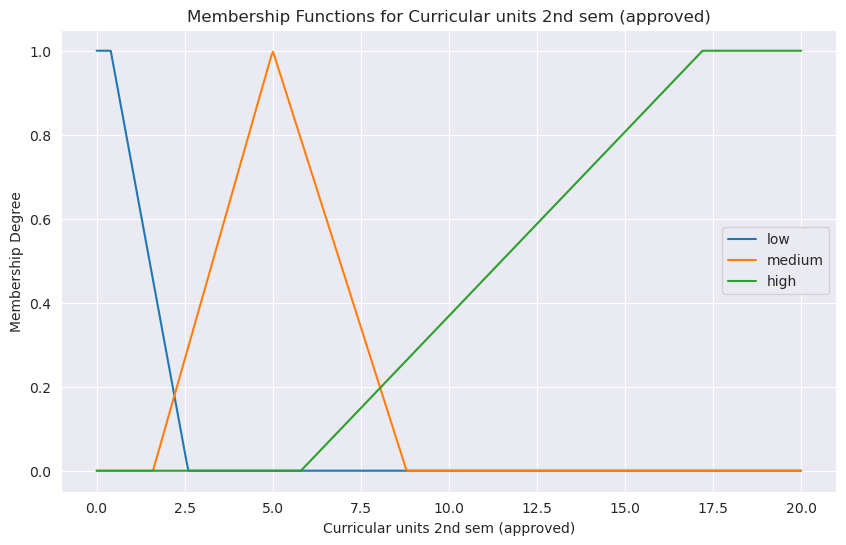

Membership function plot for Curricular units 2nd sem (approved) saved as 'Curricular units 2nd sem (approved)_membership.png'


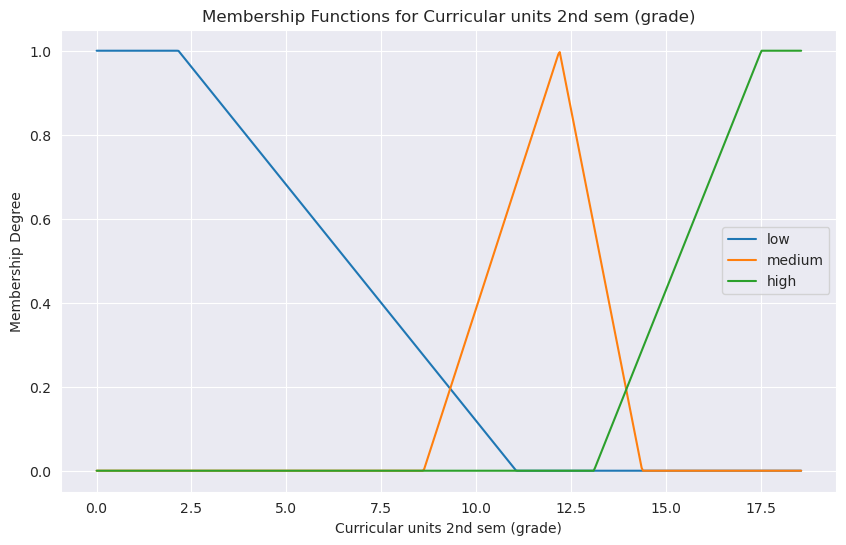

Membership function plot for Curricular units 2nd sem (grade) saved as 'Curricular units 2nd sem (grade)_membership.png'


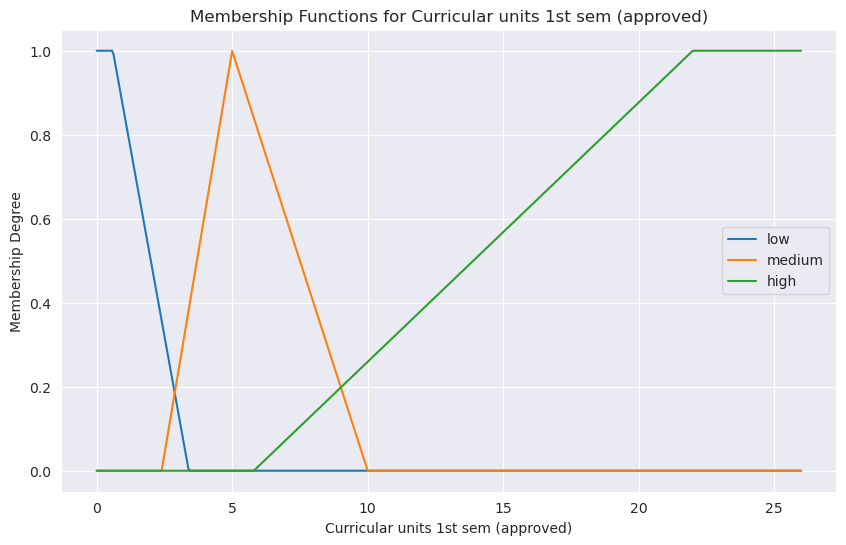

Membership function plot for Curricular units 1st sem (approved) saved as 'Curricular units 1st sem (approved)_membership.png'


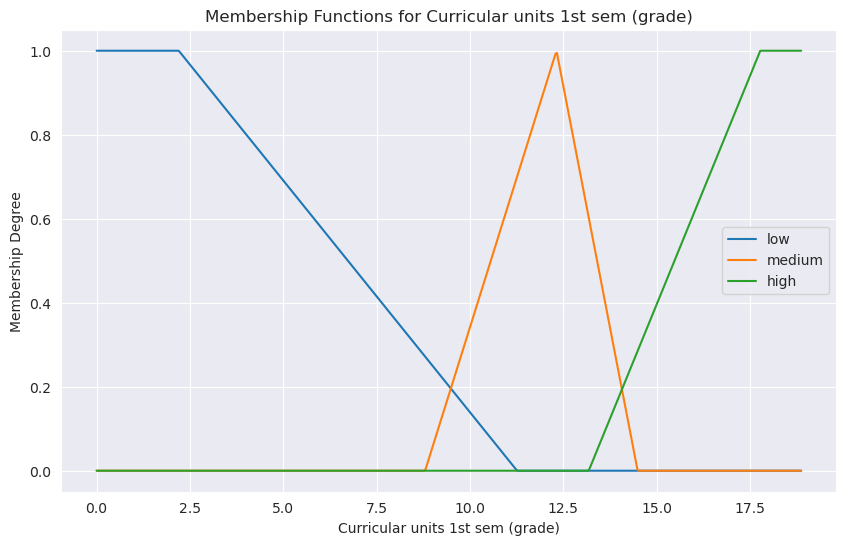

Membership function plot for Curricular units 1st sem (grade) saved as 'Curricular units 1st sem (grade)_membership.png'


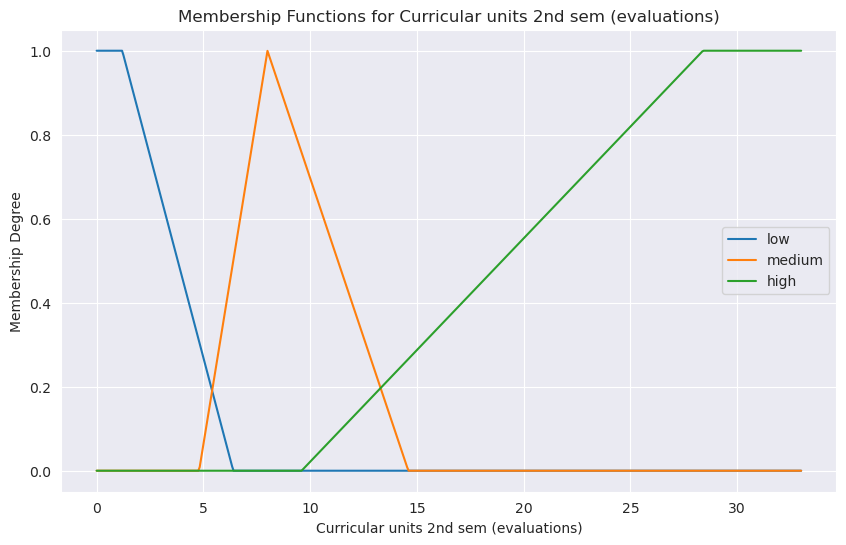

Membership function plot for Curricular units 2nd sem (evaluations) saved as 'Curricular units 2nd sem (evaluations)_membership.png'


In [213]:
# Plot for two example continuous features
example_features = continuous_features[:5]  # Select first two for demonstration
for feature in example_features:
    fuzzy_sets = define_fuzzy_sets(X_train[feature])
    plot_membership_functions(feature, fuzzy_sets)
    print(f"Membership function plot for {feature} saved as '{feature}_membership.png'")

In [214]:
# Combine all fuzzified features into a single DataFrame
fuzzy_X_train = pd.concat(
    [fuzzy_continuous[feat] for feat in continuous_features] +
    [fuzzy_binary[feat] for feat in binary_features],
    axis=1
)

# Save fuzzified training data
fuzzy_X_train.to_csv('fuzzy_X_train.csv', index=False)
print("Fuzzified training data saved as 'fuzzy_X_train.csv'")

Fuzzified training data saved as 'fuzzy_X_train.csv'


## Fuzzy Rule Extraction

In [215]:
# Load Fuzzified Data and Target Variable
fuzzy_X_train = pd.read_csv('fuzzy_X_train.csv')
train_data = pd.read_csv('train_data.csv')
y_train = train_data['Target']
fuzzy_X_train

,Curricular units 2nd sem (approved)_low,Curricular units 2nd sem (approved)_medium,Curricular units 2nd sem (approved)_high,Curricular units 2nd sem (grade)_low,Curricular units 2nd sem (grade)_medium,Curricular units 2nd sem (grade)_high,Curricular units 1st sem (approved)_low,Curricular units 1st sem (approved)_medium,Curricular units 1st sem (approved)_high,Curricular units 1st sem (grade)_low,...,Curricular units 2nd sem (enrolled)_low,Curricular units 2nd sem (enrolled)_medium,Curricular units 2nd sem (enrolled)_high,Mother's occupation_low,Mother's occupation_medium,Mother's occupation_high,Tuition fees up to date_0,Tuition fees up to date_1,Scholarship holder_0,Scholarship holder_1
0,0.0,0.000000,0.368421,0.000000,0.888268,0.000000,0.0,0.000000,0.259259,0.0,...,0.000000,0.047619,0.246154,0.941176,0.000000,0.000000,0.0,1.0,1.0,0.0
1,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.0,...,0.047619,0.500000,0.000000,0.000000,0.000000,0.549731,1.0,0.0,1.0,0.0
2,0.0,0.705882,0.000000,0.062886,0.525140,0.000000,0.0,0.615385,0.000000,0.0,...,0.000000,1.000000,0.000000,0.000000,0.902439,0.005376,0.0,1.0,1.0,0.0
3,0.0,0.736842,0.017544,0.000000,0.709607,0.000000,0.0,0.800000,0.012346,0.0,...,0.000000,1.000000,0.000000,0.058824,0.444444,0.000000,0.0,1.0,1.0,0.0
4,0.0,0.473684,0.105263,0.000000,0.000000,0.367831,0.0,0.600000,0.074074,0.0,...,0.000000,0.523810,0.092308,0.000000,1.000000,0.000000,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0.0,0.000000,0.368421,0.000000,0.724891,0.000000,0.0,0.000000,0.259259,0.0,...,0.000000,0.047619,0.246154,0.000000,0.902439,0.005376,0.0,1.0,0.0,1.0
3535,0.0,0.736842,0.017544,0.000000,0.002729,0.287139,0.0,0.800000,0.012346,0.0,...,0.000000,1.000000,0.000000,0.000000,0.902439,0.005376,0.0,1.0,1.0,0.0
3536,0.0,0.000000,0.368421,0.000000,0.724891,0.000000,0.0,0.000000,0.259259,0.0,...,0.000000,0.000000,0.323077,0.000000,0.902439,0.005376,0.0,1.0,1.0,0.0
3537,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.0,...,0.000000,1.000000,0.000000,0.000000,0.902439,0.005376,0.0,1.0,1.0,0.0


In [216]:
# Validate input
if not any(col.endswith(('_low', '_medium', '_high')) for col in fuzzy_X_train.columns):
    raise ValueError("No valid columns found.")
if len(fuzzy_X_train) != len(y_train):
    raise ValueError("Data length mismatch.")

In [217]:
# Generate candidate rules
features = {col.split('_')[0] for col in fuzzy_X_train.columns if col.endswith(('_low', '_medium', '_high'))}
rules = []
antecedent_set = set()  # To track unique antecedents
for i in range(len(fuzzy_X_train)):
    antecedent = []
    for feat in features:
        memberships = fuzzy_X_train.iloc[i][[f"{feat}_low", f"{feat}_medium", f"{feat}_high"]]
        max_label = memberships.idxmax().split('_')[-1]
        antecedent.append((feat, max_label))
    antecedent_tuple = tuple(antecedent)
    if antecedent_tuple not in antecedent_set:  # Avoid duplicate antecedents
        antecedent_set.add(antecedent_tuple)
        rules.append((antecedent, y_train[i]))

In [218]:
# Calculate confidence weights for each rule.
rule_weights = {}
for antecedent, consequent in rules:
    # Create a mask for rows matching the antecedent
    match_mask = np.ones(len(fuzzy_X_train), dtype=bool)
    for feat, label in antecedent:
        match_mask &= fuzzy_X_train[f"{feat}_{label}"] > 0

    match_indices = np.where(match_mask)[0]
    if len(match_indices) > 0:
        correct_matches = np.sum(y_train.iloc[match_indices] == consequent)
        confidence = correct_matches / len(match_indices)
    else:
        confidence = 0

    rule_key = (tuple(antecedent), consequent)
    rule_weights[rule_key] = confidence

print("Calculated confidence weights for candidate rules.")

Calculated confidence weights for candidate rules.


In [219]:
# Select the rule with the highest confidence for each unique antecedent.
antecedent_dict = {}
for rule, weight in rule_weights.items():
    antecedent, consequent = rule
    antecedent_key = tuple(antecedent)
    if antecedent_key not in antecedent_dict or weight > antecedent_dict[antecedent_key][1]:
        antecedent_dict[antecedent_key] = (rule, weight)
strongest_rules = [rule for rule, weight in antecedent_dict.values() if weight > 0]  # Filter low-confidence rules

print(f"Selected {len(strongest_rules)} strongest rules.")

Selected 818 strongest rules.


## Rule Selection Using Genetic Algorithm (GA)

In [220]:
# Initialize Population
num_rules = len(strongest_rules)

def initialize_population(pop_size, num_rules):
    return np.random.randint(2, size=(pop_size, num_rules))

pop_size = 200
population = initialize_population(pop_size, num_rules)
print(f"Initialized population with {pop_size} individuals.")

Initialized population with 200 individuals.


In [221]:
# Define Fitness Function
def predict_with_rules(selected_rules, fuzzy_X):
    """Vectorized prediction using selected rules."""
    y_pred = np.full(len(fuzzy_X), y_train.iloc[0])  # Default prediction
    max_confidences = np.zeros(len(fuzzy_X))

    for rule in selected_rules:
        antecedent, consequent = rule
        # Compute confidence for all rows at once
        confidences = np.ones(len(fuzzy_X))
        for feat, label in antecedent:
            confidences *= fuzzy_X[f"{feat}_{label}"].to_numpy()
        # Update predictions where confidence is higher
        mask = confidences > max_confidences
        y_pred[mask] = consequent
        max_confidences[mask] = confidences[mask]

    return y_pred

def fitness_function(chromosome, rules, fuzzy_X, y):
    selected_rules = [rules[i] for i in range(len(rules)) if chromosome[i] == 1]
    if not selected_rules:
        return 0
    y_pred = predict_with_rules(selected_rules, fuzzy_X)
    accuracy = np.mean(y_pred == y)
    penalty = len(selected_rules) / num_rules
    return accuracy - 0.1 * penalty


In [222]:
# Define GA Operations
def selection(population, fitnesses, num_parents):
    fitnesses = np.array(fitnesses)  # Convert fitnesses to NumPy array
    parents = []
    for _ in range(num_parents):
        tournament = np.random.choice(len(population), size=5, replace=False)
        best_idx = tournament[np.argmax(fitnesses[tournament])]
        parents.append(population[best_idx])
    return np.array(parents)


def crossover(parents, offspring_size):
    offspring = []
    for _ in range(offspring_size):
        parent1, parent2 = parents[np.random.choice(len(parents), size=2, replace=False)]
        if len(parent1) <= 2:
            offspring.append(parent1.copy())
            continue
        crossover_point = np.random.randint(1, len(parent1))
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        offspring.append(child)
    return np.array(offspring)


def mutation(offspring, mutation_rate=0.1):
    mask = np.random.random(offspring.shape) < mutation_rate
    offspring[mask] = 1 - offspring[mask]
    return offspring

In [223]:
# Run Genetic Algorithm
num_generations = 30
num_parents = pop_size // 2
offspring_size = pop_size - num_parents
fitnesses = np.zeros(num_generations)
for generation in range(num_generations):
    fitnesses = [fitness_function(ind, strongest_rules, fuzzy_X_train, y_train) for ind in population]
    parents = selection(population, fitnesses, num_parents)
    offspring = crossover(parents, offspring_size)
    offspring = mutation(offspring)
    population = np.vstack((parents, offspring))
    best_fitness = max(fitnesses)
    print(f"Generation {generation + 1}: Best Fitness = {best_fitness:.5f}")

best_idx = np.argmax(fitnesses)
best_chromosome = population[best_idx]

Generation 1: Best Fitness = 0.59561
Generation 2: Best Fitness = 0.59675
Generation 3: Best Fitness = 0.60608
Generation 4: Best Fitness = 0.60608
Generation 5: Best Fitness = 0.60740
Generation 6: Best Fitness = 0.61196
Generation 7: Best Fitness = 0.61196
Generation 8: Best Fitness = 0.61214
Generation 9: Best Fitness = 0.61286
Generation 10: Best Fitness = 0.61478
Generation 11: Best Fitness = 0.61764
Generation 12: Best Fitness = 0.61764
Generation 13: Best Fitness = 0.61764
Generation 14: Best Fitness = 0.61842
Generation 15: Best Fitness = 0.61842
Generation 16: Best Fitness = 0.61842
Generation 17: Best Fitness = 0.62063
Generation 18: Best Fitness = 0.62063
Generation 19: Best Fitness = 0.62063
Generation 20: Best Fitness = 0.62063
Generation 21: Best Fitness = 0.62160
Generation 22: Best Fitness = 0.62160
Generation 23: Best Fitness = 0.62387
Generation 24: Best Fitness = 0.62387
Generation 25: Best Fitness = 0.62387
Generation 26: Best Fitness = 0.62387
Generation 27: Best F

In [225]:
# Select best rules
selected_rules = [strongest_rules[i] for i in range(len(strongest_rules)) if best_chromosome[i] == 1]
selected_rules

[((('Curricular units 2nd sem (evaluations)', 'medium'),
   ('Curricular units 2nd sem (enrolled)', 'high'),
   ('Curricular units 1st sem (enrolled)', 'high'),
   ('Curricular units 1st sem (approved)', 'high'),
   ("Mother's occupation", 'low'),
   ('Age at enrollment', 'medium'),
   ('Curricular units 2nd sem (approved)', 'high'),
   ('Curricular units 1st sem (grade)', 'medium'),
   ('Application mode', 'high'),
   ('Course', 'medium'),
   ('Curricular units 1st sem (evaluations)', 'medium'),
   ('Curricular units 2nd sem (grade)', 'medium'),
   ('Previous qualification (grade)', 'low')),
  2),
 ((('Curricular units 2nd sem (evaluations)', 'high'),
   ('Curricular units 2nd sem (enrolled)', 'medium'),
   ('Curricular units 1st sem (enrolled)', 'medium'),
   ('Curricular units 1st sem (approved)', 'medium'),
   ("Mother's occupation", 'medium'),
   ('Age at enrollment', 'medium'),
   ('Curricular units 2nd sem (approved)', 'medium'),
   ('Curricular units 1st sem (grade)', 'medium')

 ## Fuzzy Inference for Classification

In [226]:
# Load test data
test_data = pd.read_csv('test_data.csv')
X_test = test_data.drop('Target', axis=1)
y_test = test_data['Target']

In [227]:
# Load training data to recompute fuzzy set parameters (from original training data)
train_data_original = pd.read_csv('train_data.csv')
X_train_original = train_data_original.drop('Target', axis=1)

# Define fuzzy sets for test data using TRAINING parameters
continuous_features = [col for col in X_train_original.columns if X_train_original[col].nunique() > 2]
feature_fuzzy_params = {}
for feature in continuous_features:
    feature_fuzzy_params[feature] = define_fuzzy_sets(X_train_original[feature])

In [228]:
# Fuzzify test data
fuzzy_X_test_list = []
for feature in continuous_features:
    fuzzy_sets = feature_fuzzy_params[feature]
    fuzzified = fuzzify_continuous(X_test[feature], fuzzy_sets)
    fuzzy_X_test_list.append(fuzzified)

In [229]:
# Handle binary features
binary_features = [col for col in X_test.columns if X_test[col].nunique() == 2]
for feature in binary_features:
    fuzzified = fuzzify_binary(X_test[feature])
    fuzzy_X_test_list.append(fuzzified)

fuzzy_X_test = pd.concat(fuzzy_X_test_list, axis=1)

In [230]:
# Align columns to match training (ensure same order/columns)
fuzzy_X_train_columns = pd.read_csv('fuzzy_X_train.csv').columns
fuzzy_X_test = fuzzy_X_test.reindex(columns=fuzzy_X_train_columns, fill_value=0)

# Select rules using best_chromosome from GA
selected_rules = [strongest_rules[i] for i in range(len(strongest_rules)) if best_chromosome[i] == 1]

# Predict using selected rules
y_pred = predict_with_rules(selected_rules, fuzzy_X_test)

In [231]:
# Save predictions
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test_results.to_csv('test_predictions.csv', index=False)
print("Test predictions saved to 'test_predictions.csv'.")

Test predictions saved to 'test_predictions.csv'.


## Model Evaluation


In [232]:
# Load predictions
test_results = pd.read_csv('test_predictions.csv')
y_test = test_results['Actual']
y_pred = test_results['Predicted']

In [233]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Evaluation Metrics:
Accuracy: 0.5977
Precision: 0.6031
Recall: 0.5977
F1 Score: 0.5490


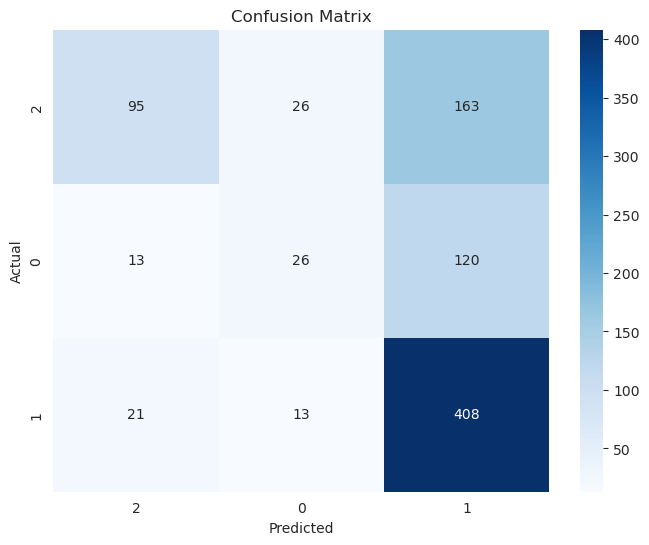

In [234]:
class_names = train_data['Target'].unique().tolist()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Interpretation and Visualization

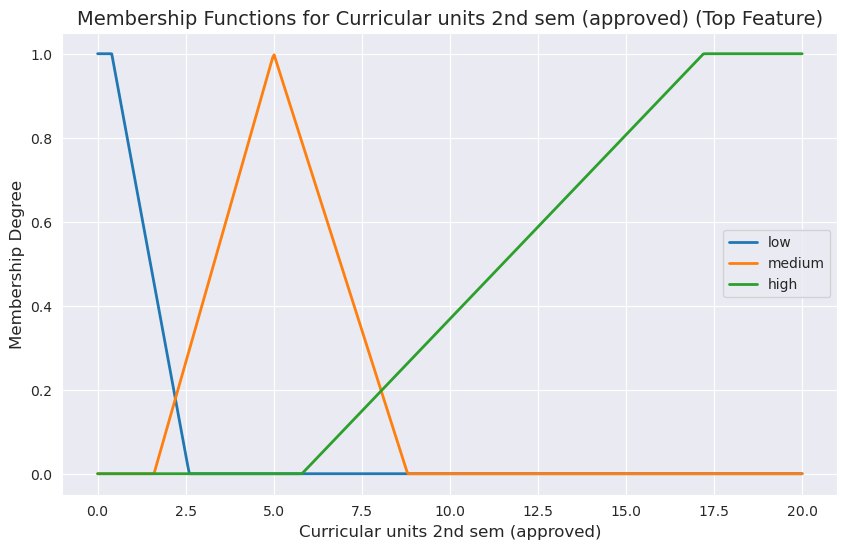

In [235]:
# Plot fuzzy membership functions for the most important continuous feature
top_feature = mi_df.sort_values('MI Score', ascending=False).iloc[0]['Feature']
if top_feature in continuous_features:
    fuzzy_sets = feature_fuzzy_params[top_feature]
    x = np.linspace(X_train[top_feature].min(), X_train[top_feature].max(), 500)
    plt.figure(figsize=(10, 6))
    for label, params in fuzzy_sets.items():
        a, b, c, boundary = params
        y = [triangular_membership(val, a, b, c, boundary) for val in x]
        plt.plot(x, y, label=label, linewidth=2)
    plt.title(f'Membership Functions for {top_feature} (Top Feature)', fontsize=14)
    plt.xlabel(top_feature, fontsize=12)
    plt.ylabel('Membership Degree', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.show()

Normalized rule activation heatmap:


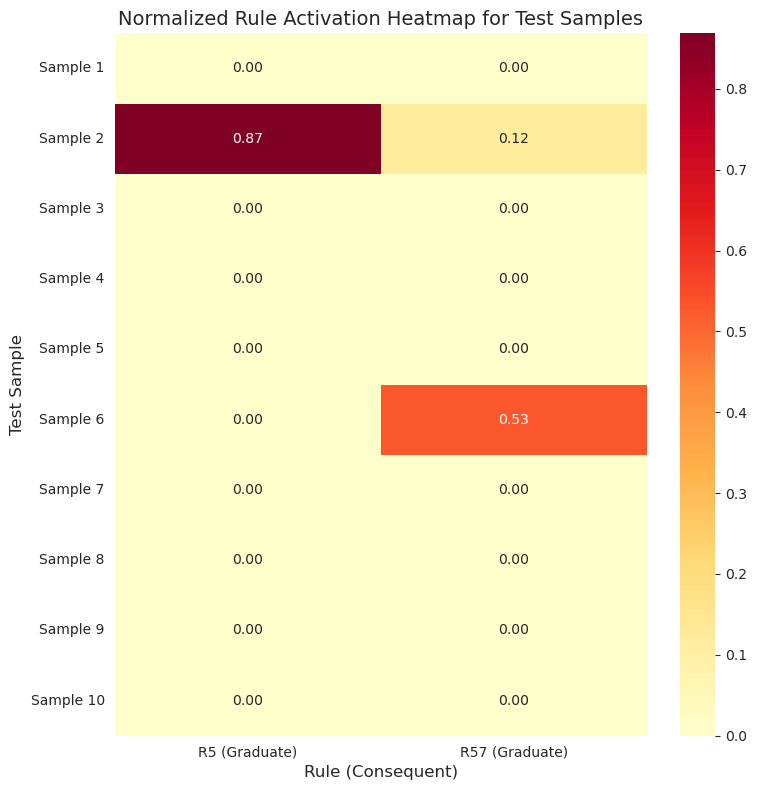

In [238]:
# Improved rule activation visualization using a heatmap
# Parameters
num_samples = min(10, len(fuzzy_X_test))
activation_threshold = 0.5  # Minimum activation to consider a rule significant

# Compute activations with normalization
activations = np.zeros((num_samples, len(selected_rules)))
consequents = [rule[1] for rule in selected_rules]
for i in range(num_samples):
    sample = fuzzy_X_test.iloc[i]
    for j, rule in enumerate(selected_rules):
        antecedent, _ = rule
        confidence = 1.0
        for feat, label in antecedent:
            confidence *= sample[f"{feat}_{label}"]
        activations[i, j] = confidence
    # Normalize activations per sample to sum to 1 (if sum > 0)
    row_sum = np.sum(activations[i])
    if row_sum > 0:
        activations[i] = activations[i] / row_sum

# Filter rules with significant activation
significant_rule_indices = np.where(np.max(activations, axis=0) >= activation_threshold)[0]
if len(significant_rule_indices) == 0:
    print("No rules with activation above threshold. Showing top 5 rules by max activation.")
    significant_rule_indices = np.argsort(np.max(activations, axis=0))[-5:]

# Subset activations and consequents for significant rules
activations_filtered = activations[:, significant_rule_indices]
consequents_filtered = [consequents[i] for i in significant_rule_indices]

# Plot heatmap
plt.figure(figsize=(max(8, len(significant_rule_indices) * 0.5), 8))
sns.heatmap(
    activations_filtered,
    cmap='YlOrRd',
    annot=True,
    fmt='.2f',
    xticklabels=[f'R{j+1} ({label_encoder.inverse_transform([c])[0]})' for j, c in zip(significant_rule_indices, consequents_filtered)],
    yticklabels=[f'Sample {i+1}' for i in range(num_samples)]
)
plt.title('Normalized Rule Activation Heatmap for Test Samples', fontsize=14)
plt.xlabel('Rule (Consequent)', fontsize=12)
plt.ylabel('Test Sample', fontsize=12)
plt.tight_layout()
print("Normalized rule activation heatmap:")
plt.show()



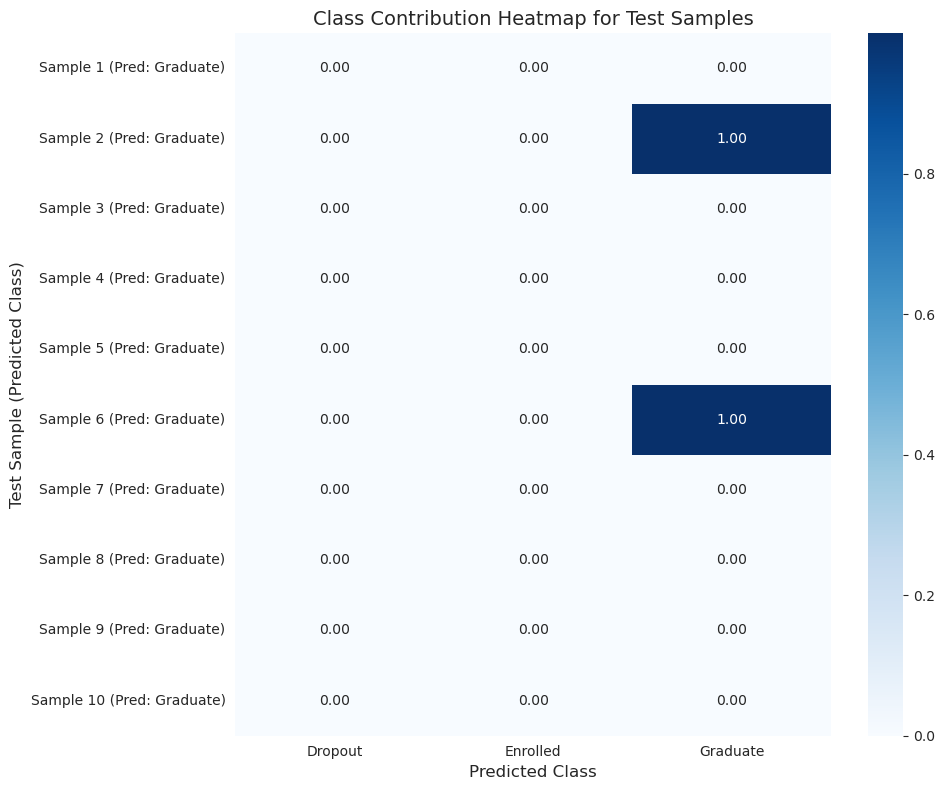

In [239]:
# Predict classes for the samples
y_pred_samples = predict_with_rules(selected_rules, fuzzy_X_test.iloc[:num_samples])

# Compute contributions of each class per sample
class_contributions = np.zeros((num_samples, len(label_encoder.classes_)))
for i in range(num_samples):
    sample = fuzzy_X_test.iloc[i]
    for j, rule in enumerate(selected_rules):
        antecedent, consequent = rule
        confidence = 1.0
        for feat, label in antecedent:
            confidence *= sample[f"{feat}_{label}"]
        class_contributions[i, consequent] += confidence

# Normalize contributions per sample
for i in range(num_samples):
    row_sum = np.sum(class_contributions[i])
    if row_sum > 0:
        class_contributions[i] = class_contributions[i] / row_sum

# Plot class contributions
plt.figure(figsize=(10, 8))
sns.heatmap(
    class_contributions,
    cmap='Blues',
    annot=True,
    fmt='.2f',
    xticklabels=label_encoder.classes_,
    yticklabels=[f'Sample {i+1} (Pred: {label_encoder.inverse_transform([y_pred_samples[i]])[0]})' for i in range(num_samples)]
)
plt.title('Class Contribution Heatmap for Test Samples', fontsize=14)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('Test Sample (Predicted Class)', fontsize=12)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

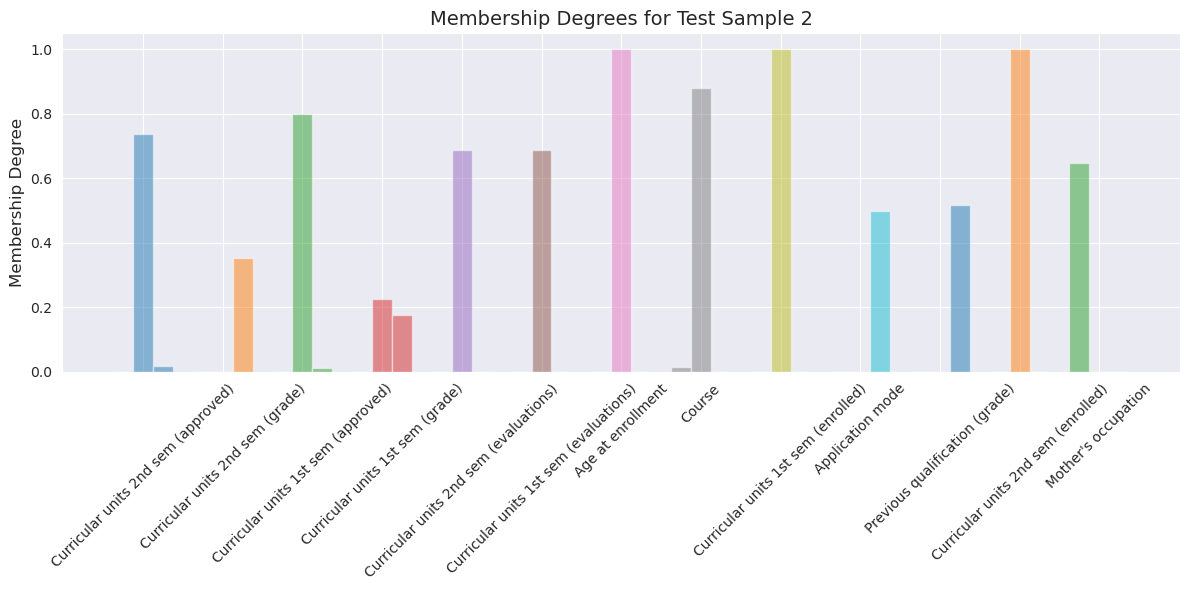

In [240]:
# Visualize inference for a single test sample
sample_idx = 1
sample = fuzzy_X_test.iloc[0]
feature_memberships = {}
for feat in continuous_features:
    memberships = [sample[f"{feat}_{label}"] for label in ['low', 'medium', 'high']]
    feature_memberships[feat] = memberships

plt.figure(figsize=(12, 6))
for i, (feat, memberships) in enumerate(feature_memberships.items()):
    plt.bar([i*4 + j for j in range(3)], memberships, width=1, label=feat, alpha=0.5)
plt.xticks([i*4 + 1 for i in range(len(feature_memberships))], feature_memberships.keys(), rotation=45)
plt.title(f'Membership Degrees for Test Sample {sample_idx+1}', fontsize=14)
plt.ylabel('Membership Degree', fontsize=12)
plt.tight_layout()
plt.show

In [241]:
# Interpret key rules
print("Top 5 Rules by Confidence:")
sorted_rules = sorted(selected_rules, key=lambda x: rule_weights[x], reverse=True)[:5]
for idx, (rule, weight) in enumerate(zip(sorted_rules, [rule_weights[r] for r in sorted_rules])):
    antecedent, consequent = rule
    print(f"Rule {idx+1}: IF {' AND '.join([f'{feat} is {label}' for feat, label in antecedent])} THEN {consequent} (Confidence: {weight:.2f})")

Top 5 Rules by Confidence:
Rule 1: IF Curricular units 2nd sem (evaluations) is medium AND Curricular units 2nd sem (enrolled) is medium AND Curricular units 1st sem (enrolled) is low AND Curricular units 1st sem (approved) is low AND Mother's occupation is medium AND Age at enrollment is medium AND Curricular units 2nd sem (approved) is medium AND Curricular units 1st sem (grade) is low AND Application mode is high AND Course is high AND Curricular units 1st sem (evaluations) is low AND Curricular units 2nd sem (grade) is medium AND Previous qualification (grade) is low THEN 0 (Confidence: 1.00)
Rule 2: IF Curricular units 2nd sem (evaluations) is low AND Curricular units 2nd sem (enrolled) is medium AND Curricular units 1st sem (enrolled) is low AND Curricular units 1st sem (approved) is low AND Mother's occupation is medium AND Age at enrollment is low AND Curricular units 2nd sem (approved) is low AND Curricular units 1st sem (grade) is low AND Application mode is medium AND Course

In [250]:
import ipywidgets as widgets
from IPython.display import display, clear_output

feature_dropdown = widgets.Dropdown(
    options=continuous_features,
    description='Feature:',
    layout=widgets.Layout(width='60%')
)
out_membership = widgets.Output()

def on_feature_change(change):
    if change['name'] == 'value':
        feature = change['new']
        with out_membership:
            clear_output(wait=True)
            # Plot membership functions
            x = np.linspace(
                X_train_original[feature].min(),
                X_train_original[feature].max(),
                500
            )
            plt.figure(figsize=(6, 4))
            for label, params in feature_fuzzy_params[feature].items():
                a, b, c, boundary = params
                y = [triangular_membership(val, a, b, c, boundary) for val in x]
                plt.plot(x, y, label=label, linewidth=2)
            plt.title(f"Membership Functions for {feature}")
            plt.xlabel(feature)
            plt.ylabel('Membership Degree')
            plt.grid(True, linestyle='--', alpha=0.01)
            plt.legend()
            plt.show()

feature_dropdown.observe(on_feature_change, names='value')
# Initial display
on_feature_change({'name': 'value', 'new': feature_dropdown.value})

tab1 = widgets.VBox([feature_dropdown, out_membership])

# --- Tab 2: Rule Confidence ---
rules_df = pd.DataFrame([
    {
        'Rule':
            f"IF {' AND '.join([f'{feat} is {label}' for feat, label in rule[0]])} "
            f"THEN {label_encoder.inverse_transform([rule[1]])[0]}",
        'Confidence': rule_weights[(tuple(rule[0]), rule[1])]
    }
    for rule in selected_rules
])
rules_df = rules_df.sort_values('Confidence', ascending=False).reset_index(drop=True)
out_rules = widgets.Output()

def show_top_rules(n=10):
    with out_rules:
        clear_output()
        display(rules_df.head(n))

show_top_rules(10)

tab2 = widgets.VBox([
    widgets.HTML(value='<b>Top Rules by Confidence</b>'),
    out_rules
], width='100%')

# --- Tab 3: Rule Activation for a Sample ---
sample_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=min(50, len(fuzzy_X_test)),
    step=1,
    description='Sample:',
    layout=widgets.Layout(width='50%')
)
thresh_slider = widgets.FloatSlider(
    value=0.001,
    min=0,
    max=1,
    step=0.001,
    description='Thresh:',
    layout=widgets.Layout(width='50%')
)
out_activation = widgets.Output()

def update_activation(change=None):
    idx = sample_slider.value - 1
    sample = fuzzy_X_test.iloc[idx]
    # Compute activations per rule
    activations = []
    for rule in selected_rules:
        antecedent, _ = rule
        conf = 1.0
        for feat, label in antecedent:
            conf *= sample[f"{feat}_{label}"]
        activations.append(conf)
    # Prepare DataFrame
    act_arr = np.array(activations)
    df_act = pd.DataFrame({
        'Rule': [f'R{i+1}' for i in range(len(selected_rules))],
        'Activation': act_arr
    })
    # Filter by threshold
    df_act = df_act[df_act['Activation'] >= thresh_slider.value]
    df_act = df_act.sort_values('Activation', ascending=False).reset_index(drop=True)

    with out_activation:
        clear_output(wait=True)
        display(df_act)

sample_slider.observe(update_activation, names='value')
thresh_slider.observe(update_activation, names='value')
update_activation()

tab3 = widgets.VBox([widgets.HBox([sample_slider, thresh_slider]), out_activation])

# --- Assemble Tabs ---
tabs = widgets.Tab([tab1, tab2, tab3])
tabs.set_title(0, 'Membership')
tabs.set_title(1, 'Rules')
tabs.set_title(2, 'Activation')

display(tabs)


In [251]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Comparison with Alternative Models
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print("Decision TreeEvaluation Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")




Decision TreeEvaluation Metrics:
Accuracy: 0.6847
Precision: 0.6912
Recall: 0.6847
F1 Score: 0.6877


In [252]:
svm = SVC(class_weight='balanced')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted', zero_division=0)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted', zero_division=0)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)
print("\nSVM Evaluation Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")


SVM Evaluation Metrics:
Accuracy: 0.1853
Precision: 0.1538
Recall: 0.1853
F1 Score: 0.0846
